<a href="https://colab.research.google.com/github/deepalikonety/Smart-Spoon-Project/blob/main/Sentiment_Analysis_%26_User_Behavior_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas nltk textblob matplotlib seaborn wordcloud openpyxl

import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import files
uploaded = files.upload()

# Replace with your actual sheet name if needed
df = pd.read_excel("Smart Spoon Market Research Questionnaire  (Responses).xlsx")
df.head()


Saving Smart Spoon Market Research Questionnaire  (Responses).xlsx to Smart Spoon Market Research Questionnaire  (Responses) (1).xlsx


,Timestamp,Age,Gender,Do you follow a low-sodium diet? ( Low-sodium diets are recommended for people who need to reduce salt intake for health reasons (like high blood pressure or kidney disease).,"If yes, reason?",How often do you eat at restaurants?,Do you find low-sodium food options at restaurants satisfying in terms of taste?,Have you ever added salt or condiments to enhance taste in low-sodium dishes?,"Are you aware of technologies that enhance taste perception without adding sodium?( For example, devices that stimulate your taste buds using small electric signals to make food feel saltier without adding real salt.)",Would you be interested in trying a device that enhances salty and umami flavors\nusing electric stimulation?,...,Do you have any concerns regarding using technology for taste enhancement?,Any suggestions or feedback regarding low-sodium dining options?,"On average, how much salt do you use when preparing or consuming the following\ndishes? (Approximate per serving, Please estimate the amount of salt added when preparing or eating these foods per serving.) [Dal/Gojju/Palya]","On average, how much salt do you use when preparing or consuming the following\ndishes? (Approximate per serving, Please estimate the amount of salt added when preparing or eating these foods per serving.) [Sambar/Rasam/Curd]","On average, how much salt do you use when preparing or consuming the following\ndishes? (Approximate per serving, Please estimate the amount of salt added when preparing or eating these foods per serving.) [Biryani/Pulao/Rice bath]","On average, how much salt do you use when preparing or consuming the following\ndishes? (Approximate per serving, Please estimate the amount of salt added when preparing or eating these foods per serving.) [Curries (Vegetable/Chicken/Mutton)]","On average, how much salt do you use when preparing or consuming the following\ndishes? (Approximate per serving, Please estimate the amount of salt added when preparing or eating these foods per serving.) [Dosa/Idly/Chaat/Snacks:]]","On average, how much salt do you use when preparing or consuming the following\ndishes? (Approximate per serving, Please estimate the amount of salt added when preparing or eating these foods per serving.) [Dosa/Idly/Roti/Paratha/Chapathi]","On average, how much salt do you use when preparing or consuming the following\ndishes? (Approximate per serving, Please estimate the amount of salt added when preparing or eating these foods per serving.) [Pickles(upinnakayi)/Papad]",Do you find the current salt content in these dishes
0,2025-04-30 22:16:31.707,21,Female,No,NaN,Weekly,No,Sometimes,No,Yes,...,NaN,NaN,1/4 tsp,1/4 tsp,1/4 tsp,1/4 tsp,1/4 tsp,1/4 tsp,1/4 tsp,Perfect
1,2025-04-30 22:18:51.783,45,Male,Yes,HyperTension,Weekly,No,Sometimes,No,Yes,...,NaN,NaN,No Salt,No Salt,1/4 tsp,1/4 tsp,No Salt,No Salt,No Salt,Perfect
2,2025-04-30 22:20:26.822,34,Female,No,NaN,Rarely,No,Sometimes,Yes,Yes,...,NaN,NaN,1/4 tsp,1/4 tsp,1/4 tsp,1/4 tsp,1/4 tsp,1/4 tsp,1/4 tsp,Too Salty
3,2025-04-30 22:20:48.874,21,Female,No,NaN,Weekly,Sometimes,Sometimes,No,Yes,...,NaN,Nope,1/2 tsp,1/2 tsp,More than 1 tsp,1 tsp,1 tsp,1 tsp,More than 1 tsp,Perfect
4,2025-04-30 22:21:35.959,25,Female,No,NaN,Monthly,Yes,Always,Yes,Yes,...,NaN,NaN,No Salt,1/4 tsp,No Salt,No Salt,No Salt,1/4 tsp,No Salt,Too Bland


In [27]:
# Replace with the actual column name from your sheet
feedback_col = "Any suggestions or feedback regarding low-sodium dining options?"

feedback = df[feedback_col].dropna()


In [28]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])

feedback_df = feedback.apply(analyze_sentiment)
feedback_df.columns = ['Polarity', 'Subjectivity']

# Merge back to main DataFrame (optional)

df['Polarity'] = feedback_df['Polarity']
df['Subjectivity'] = feedback_df['Subjectivity']


In [29]:
def classify_sentiment(polarity):
    if polarity > 0.05:
        return "Positive"
    elif polarity < -0.05:
        return "Negative"
    else:
        return "Neutral"


<ipython-input-30-34689c39a8d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


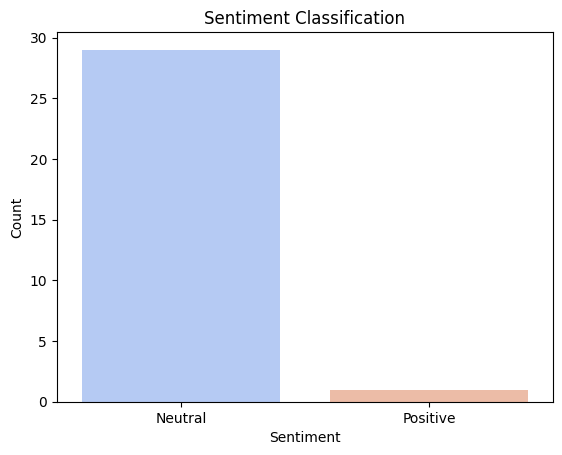

In [30]:
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title("Sentiment Classification")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


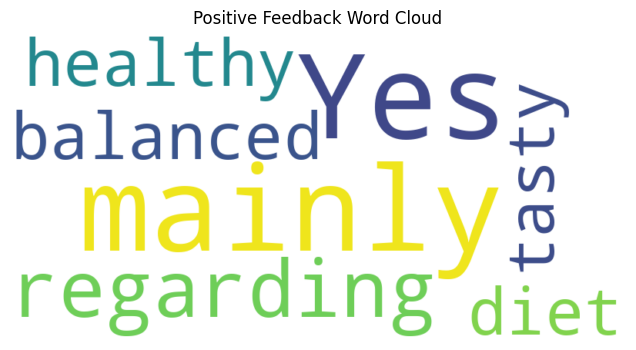

No negative feedback available to generate word cloud.


In [31]:
from wordcloud import STOPWORDS

# Generate Positive Word Cloud
if positive_text.strip():
    wc_pos = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wc_pos, interpolation='bilinear')
    plt.axis("off")
    plt.title("Positive Feedback Word Cloud")
    plt.show()
else:
    print("No positive feedback available to generate word cloud.")

# Generate Negative Word Cloud
if negative_text.strip():
    wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds', stopwords=STOPWORDS).generate(negative_text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wc_neg, interpolation='bilinear')
    plt.axis("off")
    plt.title("Negative Feedback Word Cloud")
    plt.show()
else:
    print("No negative feedback available to generate word cloud.")


In [33]:

df.to_excel("SmartSpoon_Sentiment_Analysis.xlsx", index=False)
files.download("SmartSpoon_Sentiment_Analysis.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>